<a href="https://colab.research.google.com/github/Galzi1/DataDiscoveryNNProj/blob/master/project_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge Data Discovery and Neural Networks : Final Project

In this notebook we will do some basic data analysis in python 

## Clarifications
1. The same score for the project will be given to each member of the team.  
2. When you are asked to provide a verbal solution - write it concisely and short (a couple of sentences).
3. Data decription can be found [here](https://archive.ics.uci.edu/ml/datasets/adult)

# 1. Imports

In [4]:
# add more packages in this section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


# 2. Exploratory data analysis

In [21]:
# data = pd.read_csv("data/adult.data", header = None)
data = pd.read_csv("https://raw.githubusercontent.com/Galzi1/DataDiscoveryNNProj/master/data/adult.data", header = None)
cols = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss'
    ,'hours_per_week','native_country','y']
data.columns = cols

## 2.1 Row and column count
* How many rows and columns/features we have in the dataset? 

In [11]:
### YOUR CODE HERE
rows_num = data.shape[0]
cols_num = data.shape[1]

print(f'Rows number = {rows_num}, Columns number = {cols_num}')
### END YOUR CODE

Rows number = 32561, Columns number = 15


## 2.2 Missing values proporiton
* For each feature - what is the percantage of missing values in it?
* Describe one method to fill missing data (data imputation)

If there will be many missing values then we will need to take it in consideration later 

In [31]:
### YOUR CODE HERE
# 1)
print(data.isna().sum())
print("########################")
# 2)
for c in data.columns:
  if not np.issubdtype(data[c].dtype, np.number):
    print(f'Column = {c}; unique values = {sorted(data[c].unique())}')
print("########################")
# 3)
for c in data.columns:
  if not np.issubdtype(data[c].dtype, np.number):
    print(f'Column = {c}; Number of "?" = {data[data[c] == " ?"].shape[0]}')
print("########################")


### END YOUR CODE

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
y                 0
dtype: int64
########################
Column = workclass; unique values = [' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
Column = education; unique values = [' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']
Column = marital_status; unique values = [' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
Column = occupation; unique values = [' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-

#### YOUR VERBAL SOLUTION HERE
In 1) we count the values equal to np.nan (classic na's). It turns out 0 of every column.
But we may not be over. We want to see if there are na-ish categories in the categorical features, so in 2) we get every unique category in those features.
After seeing many of the columns has "?" category included, we count every "?" in 3).

One method for filling the missing data in those categorical features is by trying to predict the category by using a simple classification algorithm such as KNN.


#### END YOUR VERBAL SOLUTION HERE

## 2.3 Categorical features

* Which of the features are categorical type? for each feature like that, how many unique values it has?

In [35]:
### YOUR CODE HERE
print(f'Pure Categorical type columns = {data.select_dtypes("category").columns.tolist()}')
print(f'Object (String) type columns (most likely categorical in purpose) = {data.select_dtypes("object").columns.tolist()}')


### END YOUR CODE

Pure Categorical type columns = []
Object (String) type columns (most likely categorical in purpose) = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'y']


## 2.4 Feature distribution

* Plot the distribution of each feature
* Is our data set balanced (do we have the same amount of <=50K and >50K in the label?)

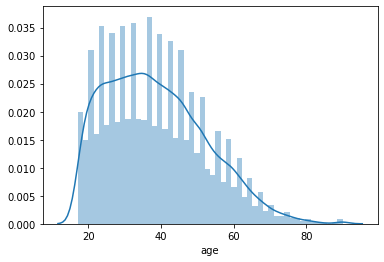

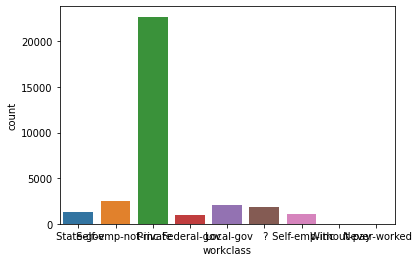

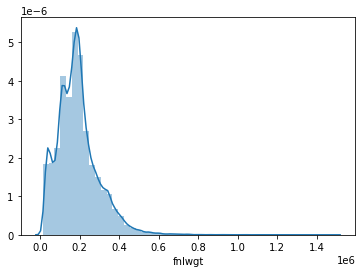

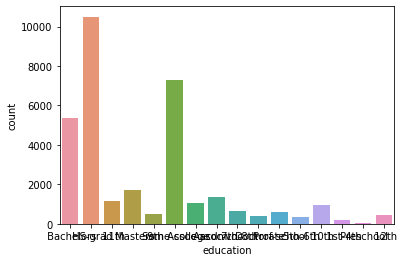

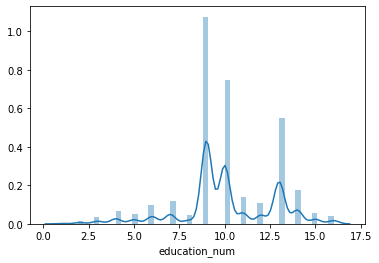

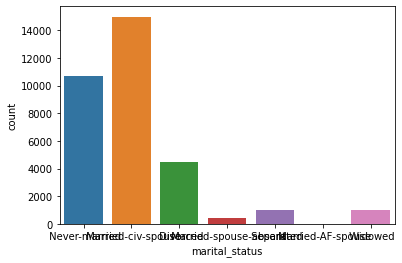

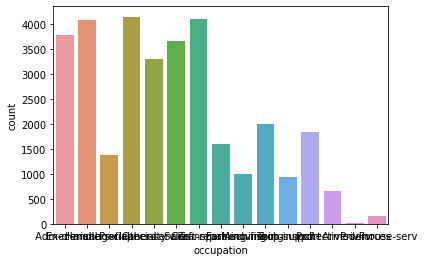

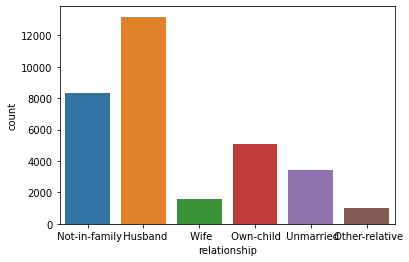

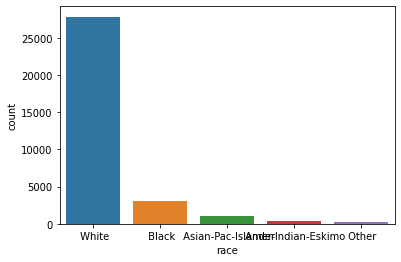

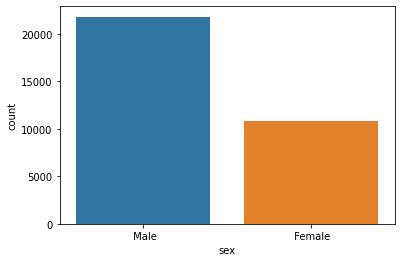

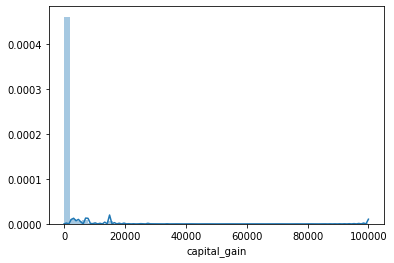

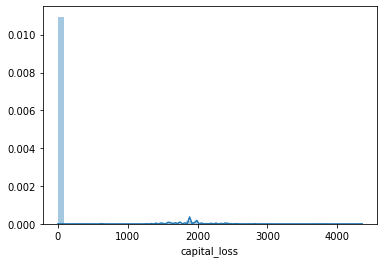

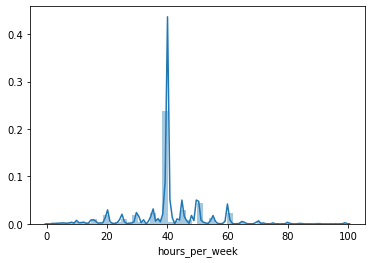

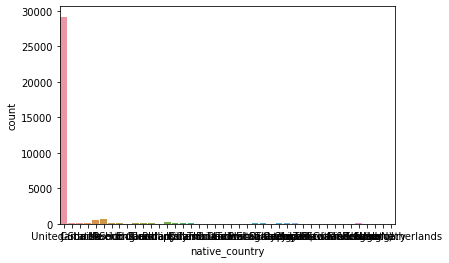

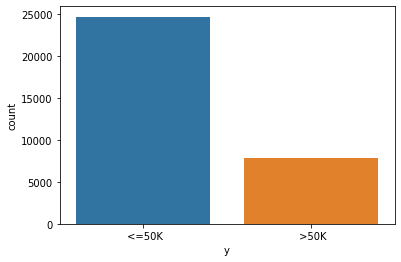

In [44]:
### YOUR CODE HERE
for c in data.columns:
  if np.issubdtype(data[c].dtype, np.number):
    sns.distplot(data[c])
    plt.show()
  else:
    sns.countplot(x=c, data=data)
    plt.show()
### END YOUR CODE

## 2.5 Correlation plot

* Plot a correlation plot between the numeric features

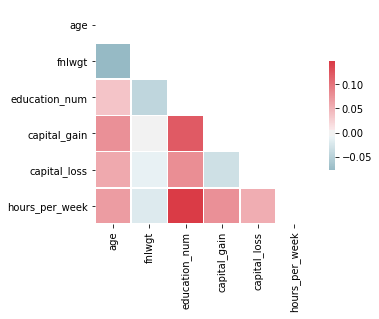

In [49]:
### YOUR CODE HERE
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### END YOUR CODE

## 2.6 Important features

* Try to understand which features will be important for the prediction and back it up with a plot or two that shows it.

It is an open question and there are many ways to approach it. 

In [22]:
### YOUR CODE HERE
!pip install shap
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

# Init shap
shap.initjs()

# One-hot encoding of the target variable
one_hot = pd.get_dummies(data['y'], drop_first=True)
# Drop column B as it is now encoded
data = data.drop('y',axis = 1)
# Join the encoded df
data = data.join(one_hot)
data.set_axis([*data.columns[:-1], 'y'], axis=1, inplace=True)

print(data.columns)

X = data.drop(['y'], axis=1)
Y = data['y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

train_cols = X_train.columns.tolist()

train_data = lgb.Dataset(X_train, label=Y_train.astype(int), 
                         feature_name=train_cols)
test_data = lgb.Dataset(X_test, label=Y_test.astype(int), 
                        feature_name=train_cols, reference=train_data)

# LGB parameters:
params = {'learning_rate': 0.05,
          'boosting': 'gbdt', 
          'objective': 'binary',
          'num_leaves': 2000,
          'min_data_in_leaf': 200,
          'max_bin': 200,
          'max_depth': 16,
          'seed': 2018,
          'nthread': 10,}


# LGB training:
lgb_model = lgb.train(params, train_data, 
                      num_boost_round=1000, 
                      valid_sets=(test_data,), 
                      valid_names=('valid',), 
                      verbose_eval=25)

explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_importance)


### END YOUR CODE

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'y'],
      dtype='object')


ValueError: ignored

#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE